# データの前処理

### CSV形式のファイルからサンプルデータを作ってみる

### かつ、欠損値データをカウントする

In [1]:
import pandas as pd
from io import StringIO

csv_data = """
A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,
"""

df = pd.read_csv(StringIO(csv_data))

StringIOなしで実行してみると違いがわかる

In [2]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [3]:
# 各特徴量の欠損値をカウント
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [4]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

### 欠損値を取り除く

In [5]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [7]:
# 全ての列がNaN、である行を削除
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [8]:
# NaNではない値が4つ未満の行を削除
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
# 特定の列にNaNが含まれていれば、その行を削除
df.dropna(subset=['D'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0


### 欠損値を補完する

In [10]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [11]:
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df.values)

imputed_data = imr.transform(df.values)
imputed_data

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

### カテゴリデータの作成

In [12]:
import pandas as pd

df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']
])
df

,0,1,2,3
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [13]:
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### サイズを整数値にマッピング

In [14]:
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


逆に戻した場合は・・・

In [15]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
inv_size_mapping

{3: 'XL', 2: 'L', 1: 'M'}

In [16]:
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

### クラスラベルのエンコーディング

In [17]:
import numpy as np
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [18]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
X = df[['color', 'size', 'price']]
X

,color,size,price
0,green,1,10.1
1,red,2,13.5
2,blue,3,15.3


In [21]:
X.values

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [22]:
X = X.values
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [23]:
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

### One-hot encoding

In [24]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [25]:
ohe = OneHotEncoder(categorical_features=[0], sparse=False)
ohe.fit_transform(X)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

### 多重共線性の解消

In [26]:
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()[:, 1:]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

### 訓練データとテストデータに分ける

wineデータセットを使う

In [27]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [28]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
df_wine.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [30]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids'
                  , 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [31]:
import numpy as np

print('Class label', np.unique(df_wine['Class label']))

Class label [1 2 3]


In [32]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [33]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

### 特徴量の尺度を揃える

### 正規化

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
mms = MinMaxScaler()

X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [37]:
X_train_norm

array([[0.64619883, 0.83201581, 0.4248366 , ..., 0.45744681, 0.28571429,
        0.19400856],
       [0.6871345 , 0.15612648, 0.65359477, ..., 0.81914894, 0.63369963,
        0.68259629],
       [0.67836257, 0.15019763, 0.65359477, ..., 0.75531915, 0.52747253,
        0.71825963],
       ...,
       [0.72222222, 0.84980237, 0.34640523, ..., 0.10638298, 0.02197802,
        0.09771755],
       [0.16081871, 0.06916996, 0.39215686, ..., 0.54255319, 0.68131868,
        0.43366619],
       [0.37719298, 0.61857708, 0.45751634, ..., 0.75531915, 0.68131868,
        0.13195435]])

In [38]:
X_test_norm

array([[ 0.69005848,  0.22924901,  0.64052288,  0.30645161,  0.55555556,
         0.69655172,  0.51687764,  0.52      ,  0.39873418,  0.40497336,
         0.69148936,  0.60805861,  0.78245364],
       [ 0.22222222,  0.14031621,  0.54248366,  0.40860215,  0.41975309,
         0.3137931 ,  0.29746835,  0.64      ,  0.19303797,  0.10746004,
         1.03191489,  0.35164835,  0.05492154],
       [ 0.87134503,  0.22332016,  0.49019608,  0.17204301,  0.32098765,
         0.52413793,  0.45991561,  0.34      ,  0.49367089,  0.31172291,
         0.57446809,  0.84615385,  0.72182596],
       [ 0.52339181,  0.2055336 ,  0.2875817 , -0.01075269,  0.37037037,
         0.57586207,  0.51054852,  0.26      ,  0.2721519 ,  0.23445826,
         0.60638298,  0.78021978,  0.55064194],
       [ 0.28070175,  0.06521739,  0.26143791,  0.38172043,  0.22222222,
         0.87586207,  0.71940928,  0.22      ,  0.48417722,  0.24511545,
         0.59574468,  0.54945055,  0.2724679 ],
       [ 0.30409357,  0.452569

### 正則化

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0)
lr.fit(X_train_std, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [ ]:
print('Training accuracy: ', lr.score(X_train_std, y_train))

In [ ]:
print('Training accuracy: ', lr.score(X_test_std, y_test))

In [ ]:
# 切片を表示してみる
lr.intercept_

In [ ]:
# 上の切片に対する、それぞれの重みは
lr.coef_

### 逐次選択の中の  
逐次後退選択について

In [42]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [43]:
class SBS():
    """
    逐次後退選択を実装
    """
    
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        
        # 特徴量の個数
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        
        # 全ての特徴量からスコアを計算
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        # 指定した特徴量の個数になるまで処理を反復
        while dim > self.k_features:
            scores = []
            subsets = []
            
            # 特徴量の部分集合を使って・・・
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            # 最良スコアのインデックスを抽出
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            # スコアを格納
            self.scores_.append(scores[best])
            
        # 最後に格納したスコア
        self.k_score_ = self.scores_[-1]
        
        return self
    
    
    def transform(self, X):
        # 抽出した特徴量を返す
        return X[:, self.indices_]
    
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        # 指定した列番号の特徴量を使ってモデルを適合
        self.estimator.fit(X_train[:, indices], y_train)
        # 予測
        y_pred = self.estimator.predict(X_test[:, indices])
        # スコア計算
        score = self.scoring(y_test, y_pred)
        return score

In [44]:
for i in combinations([1,2,3], 2):
    print(i)

(1, 2)
(1, 3)
(2, 3)


In [ ]:
s

In [ ]:
s

In [45]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)

In [47]:
sbs = SBS(knn, k_features=1)

In [48]:
sbs.fit(X_train_std, y_train)

In [ ]:
for i in sbs.subsets_:
    print(i)

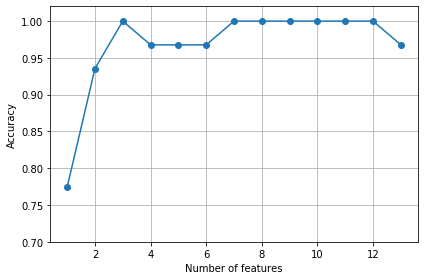

In [49]:
# 特徴量の個数のリスト
k_feat = [len(k) for k in sbs.subsets_]

# KNN分類期の正解率をグラフにしてみると・・・
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [50]:
k3 = list(sbs.subsets_)
k3

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 11),
 (0, 1, 2, 3, 4, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 11),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 11),
 (0, 1, 2, 11),
 (0, 1, 11),
 (0, 11),
 (0,)]

In [51]:
k3 = list(sbs.subsets_[10])
k3

[0, 1, 11]

In [52]:
df_wine.head(3)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [53]:
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [54]:
# 13個全ての特徴量を使うと
knn.fit(X_train_std, y_train)
print("Accuracy with 13:", knn.score(X_train_std, y_train))

Accuracy with 13: 0.967741935483871


In [55]:
# テストデータに対しては
knn.score(X_test_std, y_test)

0.9629629629629629

In [56]:
# 特徴量をk3の見つかった場合は
knn.fit(X_train_std[:, k3], y_train)
knn.score(X_train_std[:, k3], y_train)

0.9516129032258065

In [57]:
# これでテストデータに対しては
knn.score(X_test_std[:, k3], y_test)

0.9259259259259259

### ランダムフォレストで特徴量の重要度にアクセスする

In [58]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)

# 特徴量の重要度を抽出
importances = forest.feature_importances_

# 重要度の降順で、特徴量のインデックスを取得
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


ちょっとリストの練習

In [75]:
indices = np.argsort(importances)
indices

array([ 2,  7,  3,  8,  1,  4,  5, 10,  0, 11,  9,  6, 12])

In [76]:
indices[::-1]

array([12,  6,  9, 11,  0, 10,  5,  4,  1,  8,  3,  7,  2])

In [124]:
for f in range(X_train.shape[1]):
    print("{:>2}) {:<30} {:f}".format(f + 1, feat_labels[indices[f]], importances[indices[f]]))

 1) Ash                            0.013279
 2) Nonflavanoid phenols           0.013354
 3) Alcalinity of ash              0.022366
 4) Proanthocyanins                0.025570
 5) Malic acid                     0.025648
 6) Magnesium                      0.031357
 7) Total phenols                  0.050872
 8) Hue                            0.058739
 9) Alcohol                        0.118529
10) OD280/OD315 of diluted wines   0.136162
11) Color intensity                0.143920
12) Flavanoids                     0.174751
13) Proline                        0.185453


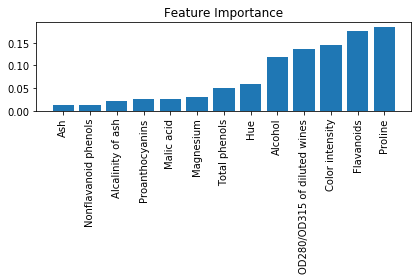

In [129]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()